## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

如何 Debugging 1/2

<pre>
檢查程式碼
養成好的程式撰寫習慣 (PEP8)
確認參數設定
欲實作的模型是否合適當前的資料
確認資料結構
資料是否足夠
是否乾淨
是否有適當的前處理
</pre>

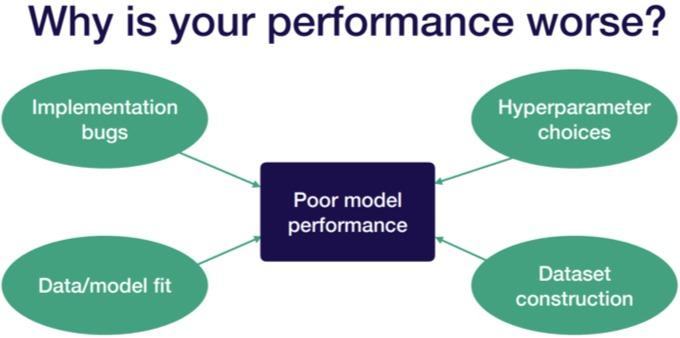

如何 Debugging 2/2
<pre>
以簡單的方式實現想法
建立評估機制
開始循環測試 (evaluate - tuning - debugging)
</pre>


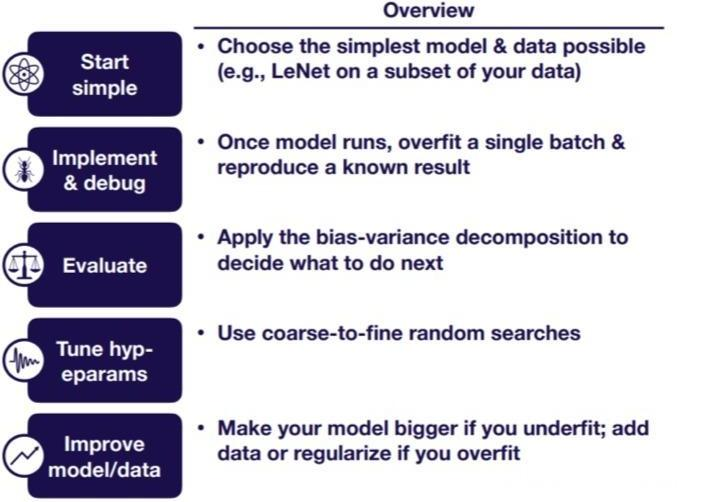


參考連結：

1. 養成良好 Coding Style: Python Coding Style – PEP8

2. Troubleshooting Deep Neural Network – A Field Guide to Fix your Model

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    
    '''
    https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1
    -1 to 1 的正規化
    '''
    if flatten:
        x = x.reshape((len(x), -1))
        
    b, a = 1, -1
    x = x.astype(float)
    max_x, min_x = x.max(), x.min()
              
    return (b-a) * (x - min_x)/(max_x - min_x) + a
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test
max_x = x_train.max()

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.7410 - acc: 0.3793 - val_loss: 1.5387 - val_acc: 0.4606
Epoch 2/100
50000/50000 [==============================] - 10s 191us/step - loss: 1.4933 - acc: 0.4719 - val_loss: 1.4667 - val_acc: 0.4898
Epoch 3/100
50000/50000 [==============================] - 10s 191us/step - loss: 1.3708 - acc: 0.5135 - val_loss: 1.4165 - val_acc: 0.5013
Epoch 4/100
50000/50000 [==============================] - 12s 244us/step - loss: 1.2765 - acc: 0.5503 - val_loss: 1.3885 - val_acc: 0.5119
Epoch 5/100
50000/50000 [==============================] - 12s 237us/step - loss: 1.1924 - acc: 0.5786 - val_loss: 1.3746 - val_acc: 0.5231
Epoch 6/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.1205 - acc: 0.6046 - val_loss: 1.3671 - val_acc: 0.5279
Epoch 7/100
50000/50000 [==============================] - 12s 

50000/50000 [==============================] - 12s 239us/step - loss: 0.1185 - acc: 0.9620 - val_loss: 3.6997 - val_acc: 0.5167
Epoch 58/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.1182 - acc: 0.9618 - val_loss: 3.6821 - val_acc: 0.5295
Epoch 59/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.0892 - acc: 0.9704 - val_loss: 3.7532 - val_acc: 0.5290
Epoch 60/100
50000/50000 [==============================] - 13s 253us/step - loss: 0.0983 - acc: 0.9688 - val_loss: 3.7722 - val_acc: 0.5222
Epoch 61/100
50000/50000 [==============================] - 12s 239us/step - loss: 0.1057 - acc: 0.9642 - val_loss: 3.7519 - val_acc: 0.5288
Epoch 62/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.0754 - acc: 0.9752 - val_loss: 3.7497 - val_acc: 0.5253
Epoch 63/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.0841 - acc: 0.9719 - val_loss: 3.8731 - val_acc: 0.5302
Epoch 64/100
50000/50000 [=

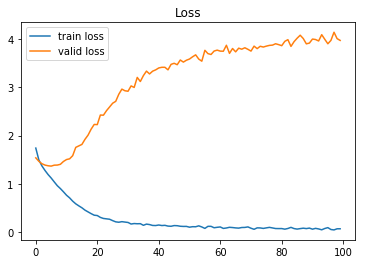

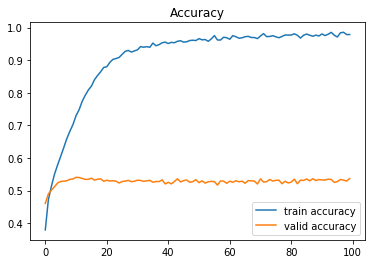

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()